In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True) #pour ne pas print en notation scientifique
import matplotlib.pyplot as plt
import re

import io
import csv
import sys 

# Progress bar
from tqdm.auto import tqdm

maxInt = sys.maxsize
while True:
    # decrease the maxInt value by factor 10 
    # as long as the OverflowError occurs.

    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)

from implementations_NB00 import*

In [2]:
header_traj_0800_0830, all_lines_0800_0830 = read_traj_csv('data/monday_d8_0800_0830_OD_trajectories.csv')
header_traj_0830_0900, all_lines_0830_0900 = read_traj_csv('data/monday_d8_0830_0900_OD_trajectories.csv')
header_traj_0900_0930, all_lines_0900_0930 = read_traj_csv('data/monday_d8_0900_0930_OD_trajectories.csv')
header_traj_0930_1000, all_lines_0930_1000 = read_traj_csv('data/monday_d8_0930_1000_OD_trajectories.csv')
header_traj_1000_1030, all_lines_1000_1030 = read_traj_csv('data/monday_d8_1000_1030_OD_trajectories.csv')
all_lines1 = all_lines_0800_0830 + all_lines_0830_0900 + all_lines_0900_0930 + all_lines_0930_1000 + all_lines_1000_1030

header_traj_0800_0830, all_lines_0800_0830 = read_traj_csv('data/tuesday_d8_0800_0830_OD_trajectories.csv')
header_traj_0830_0900, all_lines_0830_0900 = read_traj_csv('data/tuesday_d8_0830_0900_OD_trajectories.csv')
header_traj_0900_0930, all_lines_0900_0930 = read_traj_csv('data/tuesday_d8_0900_0930_OD_trajectories.csv')
header_traj_0930_1000, all_lines_0930_1000 = read_traj_csv('data/tuesday_d8_0930_1000_OD_trajectories.csv')
header_traj_1000_1030, all_lines_1000_1030 = read_traj_csv('data/tuesday_d8_1000_1030_OD_trajectories.csv')
all_lines2 = all_lines_0800_0830 + all_lines_0830_0900 + all_lines_0900_0930 + all_lines_0930_1000 + all_lines_1000_1030

header_traj_0830_0900, all_lines_0830_0900 = read_traj_csv('data/wednesday_d8_0830_0900_OD_trajectories.csv')
header_traj_0900_0930_01, all_lines_0900_0930_01 = read_traj_csv('data/wednesday_d8_0900_0930_OD_trajectories_01.csv')
header_traj_0900_0930_02, all_lines_0900_0930_02 = read_traj_csv('data/wednesday_d8_0900_0930_OD_trajectories_02.csv')
header_traj_0930_1000_01, all_lines_0930_1000_01 = read_traj_csv('data/wednesday_d8_0930_1000_OD_trajectories_01.csv')
header_traj_0930_1000_02, all_lines_0930_1000_02 = read_traj_csv('data/wednesday_d8_0930_1000_OD_trajectories_02.csv')
header_traj_1000_1030_01, all_lines_1000_1030_01 = read_traj_csv('data/wednesday_d8_1000_1030_OD_trajectories_01.csv')
header_traj_1000_1030_02, all_lines_1000_1030_02 = read_traj_csv('data/wednesday_d8_1000_1030_OD_trajectories_02.csv')
header_traj_1030_1100, all_lines_1030_1100 = read_traj_csv('data/wednesday_d8_1030_1100_OD_trajectories.csv')
all_lines3 = all_lines_0830_0900 + all_lines_0900_0930_01+all_lines_0900_0930_02 + all_lines_0930_1000_01+all_lines_0930_1000_02 + all_lines_1000_1030_01+all_lines_1000_1030_02+all_lines_1030_1100

header_traj_0800_0830, all_lines_0800_0830 = read_traj_csv('data/thursday_d8_0800_0830_OD_trajectories.csv')
header_traj_0830_0900, all_lines_0830_0900 = read_traj_csv('data/thursday_d8_0830_0900_OD_trajectories.csv')
header_traj_0900_0930, all_lines_0900_0930 = read_traj_csv('data/thursday_d8_0900_0930_OD_trajectories.csv')
header_traj_0930_1000, all_lines_0930_1000 = read_traj_csv('data/thursday_d8_0930_1000_OD_trajectories.csv')
header_traj_1000_1030_01, all_lines_1000_1030_01 = read_traj_csv('data/thursday_d8_1000_1030_OD_trajectories_01.csv')
header_traj_1000_1030_02, all_lines_1000_1030_02 = read_traj_csv('data/thursday_d8_1000_1030_OD_trajectories_02.csv')
all_lines4 = all_lines_0800_0830 + all_lines_0830_0900 + all_lines_0900_0930 + all_lines_0930_1000 + all_lines_1000_1030_01+all_lines_1000_1030_02
all_lines = all_lines1+all_lines2+all_lines3+all_lines4
update_track_id(all_lines)

## Data visualisation
### Ploting the average trajectory for each destination

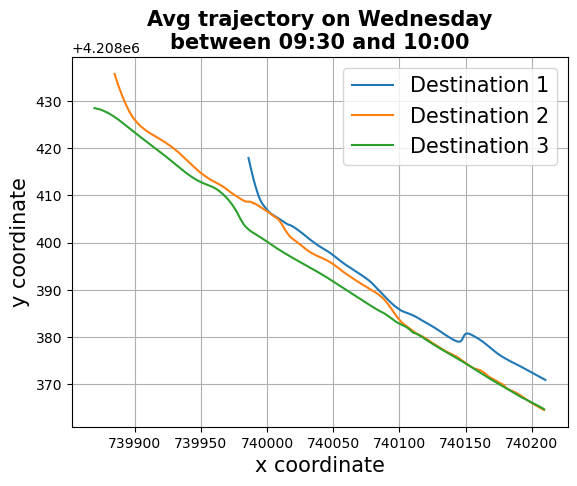

In [3]:
headers_stat, measured_22to23_t0_tf, measured_22to24_t0_tf, measured_22to25_t0_tf, infos22to23_t0_tf, infos22to24_t0_tf, infos22to25_t0_tf = open_stat_csv(
    'data/wednesday_d8_0930_1000_OD_stat.csv'
    )
plt.figure()
plt.plot(measured_22to23_t0_tf[:,0],measured_22to23_t0_tf[:,1],measured_22to24_t0_tf[:,0],measured_22to24_t0_tf[:,1],measured_22to25_t0_tf[:,0],measured_22to25_t0_tf[:,1])
plt.title(r'Avg trajectory on Wednesday' '\n' 'between 09:30 and 10:00', fontweight="bold",fontsize = 15)
plt.legend(["Destination 1","Destination 2","Destination 3"],fontsize=15)
plt.grid()
plt.xlabel("x coordinate",fontsize = 15)
plt.ylabel("y coordinate",fontsize = 15)
plt.savefig("plots/avgWednesday")
plt.show()


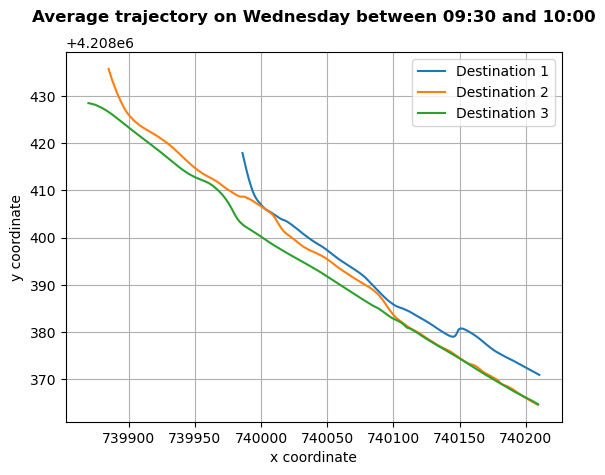

<Figure size 640x480 with 0 Axes>

In [4]:
plot_average_traj_t0_tf('data/wednesday_d8_0930_1000_OD_stat.csv','Average trajectory on Wednesday between 09:30 and 10:00')
plt.gcf()
plt.savefig("plots/avgWednesday")

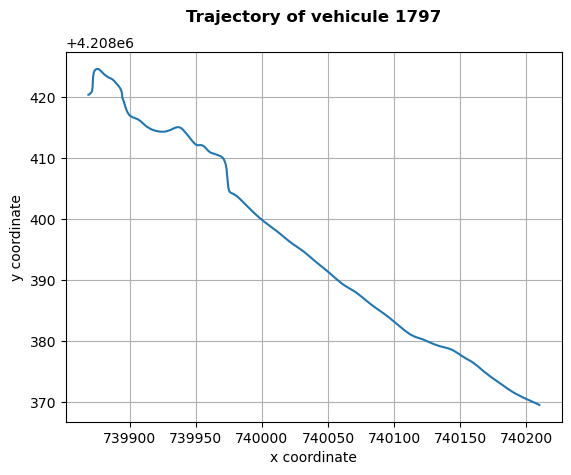

In [5]:
plot_traj_ID_i(all_lines,1797)

## Processing of the data
### Classify according to the origin and destination

In [6]:
#Classifying the data

#Destination 1
d1_ol3=list() ; d1_ol2=list() ; d1_ol1=list()
#Destination 2
d2_ol3=list() ; d2_ol2=list() ; d2_ol1=list()
#Destination 3 -> no mandatory change, all vehicles are in the same class
d3 =list()

for veh in tqdm(range(len(all_lines))):
    info_init_veh ,info_measured_veh = infos_vehicule_i(all_lines, veh)
    if info_init_veh[4] == ' Destination 1':
        if info_measured_veh[0,7] == ' "Lane 1"':
            d1_ol1.append(info_init_veh[0])
        elif info_measured_veh[0,7] == ' "Lane 2"':
            d1_ol2.append(info_init_veh[0])
        elif info_measured_veh[0,7] == ' "Lane 3"':
            d1_ol3.append(info_init_veh[0])
        else :
            print("Error : could not append to a list")
    if info_init_veh[4] == ' Destination 2':
        if info_measured_veh[0,7] == ' "Lane 1"':
            d2_ol1.append(info_init_veh[0])
        elif info_measured_veh[0,7] == ' "Lane 2"':
            d2_ol2.append(info_init_veh[0])
        elif info_measured_veh[0,7] == ' "Lane 3"':
            d2_ol3.append(info_init_veh[0])
        else :
            print("Error : could not append to a list")
    if info_init_veh[4] == ' Destination 3':
        d3.append(info_init_veh[0])

  0%|          | 0/9429 [00:00<?, ?it/s]

In [7]:
print(len(d1_ol3), len(d1_ol2), len(d1_ol1))
print(len(d2_ol3), len(d2_ol2), len(d2_ol1))
len(d3)

779 380 38
620 693 122


6797

### Comparing the MLC for each vehicle type

In [8]:
# Focus on the d2_ol3 since it should be the easiest one to find the mandatory change
# the only mandatory change is from lane 3 to lane 4

mandatory_changes_d2_ol3 = spot_mandatory_changes_d2_ol3(all_lines, d2_ol3)

In [9]:
#average coordinates of lane change for each vehicule type
#to get an idea if they are very different or not
x_motorcycle = [] ; y_motorcycle = [] ; t_motorcycle = [] ; 
x_taxi = [] ; y_taxi = [] ; t_taxi = [] ; 
x_car = [] ; y_car = [] ; t_car = [] ; 
x_medium_veh = [] ; y_medium_veh = [] ; t_medium_veh = [] ; 
x_bus = [] ; y_bus = [] ; t_bus = [] ; 
x_heavy_veh = [] ; y_heavy_veh = [] ; t_heavy_veh = [] ; 
for track_id in d2_ol3:
    if (mandatory_changes_d2_ol3[track_id][0] == ' Motorcycle'):
        x_motorcycle.append(mandatory_changes_d2_ol3[track_id][1])
        y_motorcycle.append(mandatory_changes_d2_ol3[track_id][2])
        t_motorcycle.append(mandatory_changes_d2_ol3[track_id][3])
    if (mandatory_changes_d2_ol3[track_id][0] == ' Taxi'):
        x_taxi.append(mandatory_changes_d2_ol3[track_id][1])
        y_taxi.append(mandatory_changes_d2_ol3[track_id][2])
        t_taxi.append(mandatory_changes_d2_ol3[track_id][3])
    if (mandatory_changes_d2_ol3[track_id][0] == ' Car'):
        x_car.append(mandatory_changes_d2_ol3[track_id][1])
        y_car.append(mandatory_changes_d2_ol3[track_id][2])
        t_car.append(mandatory_changes_d2_ol3[track_id][3])
    if (mandatory_changes_d2_ol3[track_id][0] == ' Medium Vehicle'):
        x_medium_veh.append(mandatory_changes_d2_ol3[track_id][1])
        y_medium_veh.append(mandatory_changes_d2_ol3[track_id][2])
        t_medium_veh.append(mandatory_changes_d2_ol3[track_id][3])
    if (mandatory_changes_d2_ol3[track_id][0] == ' Bus'):
        x_bus.append(mandatory_changes_d2_ol3[track_id][1])
        y_bus.append(mandatory_changes_d2_ol3[track_id][2])
        t_bus.append(mandatory_changes_d2_ol3[track_id][3])
    if (mandatory_changes_d2_ol3[track_id][0] == ' Heavy Vehicle'):
        x_heavy_veh.append(mandatory_changes_d2_ol3[track_id][1])
        y_heavy_veh.append(mandatory_changes_d2_ol3[track_id][2])
        t_heavy_veh.append(mandatory_changes_d2_ol3[track_id][3])
print(f'Motorcycle : {np.mean(x_motorcycle):.2f} \t {np.mean(y_motorcycle):.2f} \t {np.mean(t_motorcycle):.2f}')
print(f'Taxi : {np.mean(x_taxi):.2f} \t {np.mean(y_taxi):.2f} \t {np.mean(t_taxi):.2f}')
print(f'Car : {np.mean(x_car):.2f} \t {np.mean(y_car):.2f} \t {np.mean(t_car):.2f}')
print(f'Medium vehicle : {np.mean(x_medium_veh):.2f} \t {np.mean(y_medium_veh):.2f} \t {np.mean(t_medium_veh):.2f}')
print(f'Bus : {np.mean(x_bus):.2f} \t {np.mean(y_bus):.2f} \t {np.mean(t_bus):.2f}')
print(f'Heavy vehicle : {np.mean(x_heavy_veh):.2f} \t {np.mean(y_heavy_veh):.2f} \t {np.mean(t_heavy_veh):.2f}')

Motorcycle : 739931.83 	 4208418.41 	 477.68
Taxi : 739930.16 	 4208418.68 	 481.93
Car : 739927.21 	 4208419.19 	 455.95
Medium vehicle : 739929.80 	 4208418.76 	 479.00
Bus : 739914.95 	 4208421.31 	 542.70
Heavy vehicle : 739926.54 	 4208419.30 	 557.29


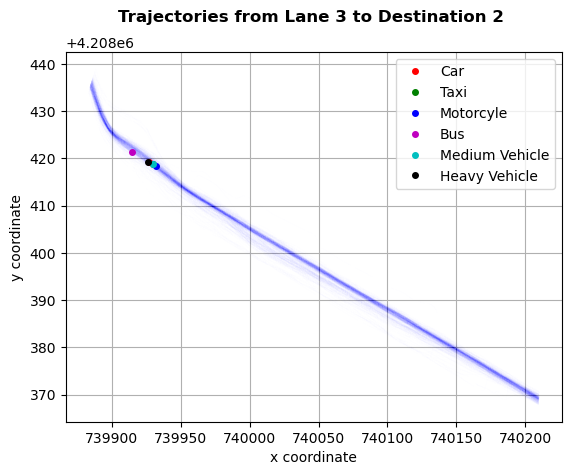

In [10]:
#The dots show the coordinates where each vehicule type changed lane on average
plt.figure()
i = "2" ; x = "3" ;
for ind in (d2_ol3):
    info_init_veh ,info_measured_veh = infos_vehicule_i(all_lines, ind)
    plt.plot(info_measured_veh[:,0],info_measured_veh[:,1],linewidth=1/len(d2_ol3),color='blue')
plt.title(f'Trajectories from Lane {x} to Destination {i} ', fontweight="bold",y=1.06)
plt.grid()
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")
plt.plot(np.mean(x_car),np.mean(y_car),'ro',markersize=4, label='Car')
plt.plot(np.mean(x_taxi),np.mean(y_taxi),'go',markersize=4, label='Taxi')
plt.plot(np.mean(x_motorcycle),np.mean(y_motorcycle),'bo',markersize=4, label='Motorcyle')
plt.plot(np.mean(x_bus),np.mean(y_bus),'mo',markersize=4, label='Bus')
plt.plot(np.mean(x_medium_veh),np.mean(y_medium_veh),'co',markersize=4, label='Medium Vehicle')
plt.plot(np.mean(x_heavy_veh),np.mean(y_heavy_veh),'ko',markersize=4, label='Heavy Vehicle')
plt.legend(loc='upper right', frameon=True)
#plt.savefig("plots/AvgChange")
plt.show()